# IS709 Recitation 1


Download data from https://archive.ics.uci.edu/ml/datasets/Iris

Please be sure that your jupyter notebook and data locates in the same folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm 
import pylab as py 

In [2]:
iris_data=pd.read_csv("iris.txt", header = None, names=["sepal_length", "sepal_width","petal_length","petal_width", "class"])

head() method gives you first five data points in the dataframe.  
Try 
>iris_data.head(7)

In [3]:
# iris_data.head()
iris_data.tail(7)

,sepal_length,sepal_width,petal_length,petal_width,class
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**describe()** method gives information about the count, mean, standard deviation, minimum and maximum value, Q1, Q2, and Q3 of the each attribute in the data frame.    
**"count"** shows the number of data points.   
**"mean"** shows the average value of the data.    
**"std"** indicates the how much the data is spread out around the mean.   
**"min"** shows the minimum value of the data.  
**"25%(First Quantile)"** indicates that the %25 of the data is less than Q1. In other words, it splits off the lowest 25% of data from the highest 75%.    
**"50%(Median)"** indicates that the %50 of the data is less than Q2.  
**"75%(Third Quantile)"** indicates that the %75 of the data is less than Q3. In other words, it splits off the highest 25% of data from the lowest 75%.  
**"max"** shows the maximum value of the data.

In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization of the data

The codes given here are just examples. Note that you have many different library or parameter options to visualize your data.

### Histograms

<AxesSubplot:>

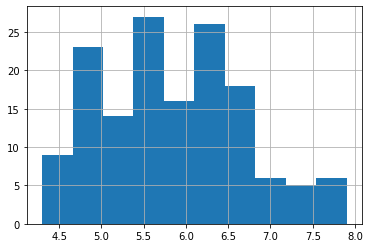

In [5]:
#simple histogram
iris_data["sepal_length"].hist()

You can customize your histogram by changing number of the bins, figure size or color.Moreover, you can modify label names, titles or add some text to your graph.

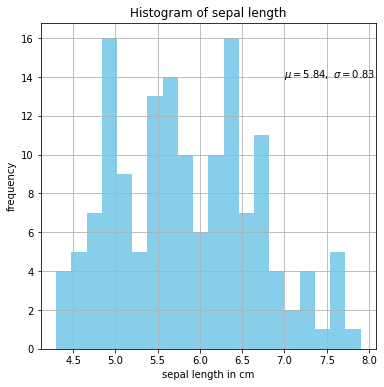

In [6]:
iris_data["sepal_length"].hist(bins=20, color="skyblue", figsize=(6,6))
plt.title("Histogram of sepal length")
plt.xlabel("sepal length in cm")
plt.ylabel("frequency")
plt.text(7, 14, r'$\mu=5.84,\ \sigma=0.83$')
plt.grid(True)
plt.show()

### Boxplots

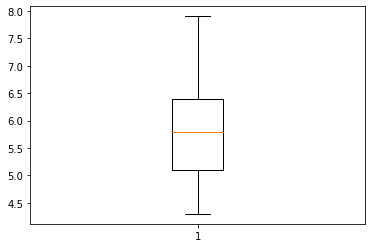

In [7]:
plt.boxplot(iris_data["sepal_length"])
plt.show()

You can customize your boxplots by changing the color&symbol of the outliers. You may create horizontal boxplots.

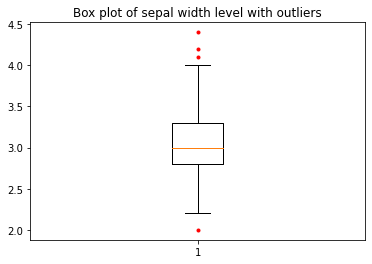

In [8]:
# plt.boxplot(iris_data["sepal_width"], sym= "c*", vert=False)
plt.boxplot(iris_data["sepal_width"], sym= "r.")
plt.title("Box plot of sepal width level with outliers")
plt.show()

You may prefer not to show outlier when creating boxplots.

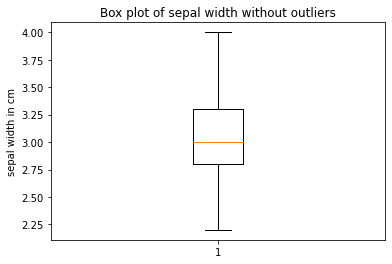

In [9]:
plt.boxplot(iris_data["sepal_width"],sym= "")
plt.title("Box plot of sepal width without outliers")
plt.ylabel("sepal width in cm")
plt.show()

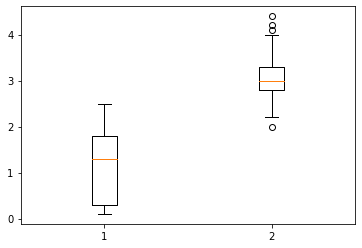

In [10]:
plt.boxplot(iris_data["petal_width"], positions=[1])
plt.boxplot(iris_data["sepal_width"],positions=[2])
plt.show()

### Scatter Plots

Before starting to scatter plots, I want to talk about Pearson Correlation Coefficient.   
Pearson Correlation Coefficient indicates the **linear relationship** between two variables.
-correlation coefficients between .10 and .29 represent a small association, 
-coefficients between .30 and .49 represent a medium association, 
-coefficients of .50 and above represent a large association or relationship.

In [11]:
# X=np.arange(-20,21)
# y=X*X
# corr, _ = pearsonr(X,y)
# print("Pearsons correlation: %.6f" % corr)

##### Try below  code chunk
X=np.arange(0,21)
y=X*X
corr, _ = pearsonr(X,y)
print("Pearsons correlation: %.6f" % corr)

Pearsons correlation: 0.965459


If you just focus on the numbers or some statistics, you may miss some important relations. As you can from the below scatter plot, X and y has a relation but Pearson Corr. Coeef. tells us something else.

**!Do not depend on just numbers and visualize your data.**  
Also please try to run below code and search why pearson correlation is approximately 0.97.  If you don't understand the reason please do not hesitate and ask me.

> X=np.arange(0,21)  
> y=X*X  
> corr, _ = pearsonr(X,y)  
> print("Pearsons correlation: %.6f" % corr)  

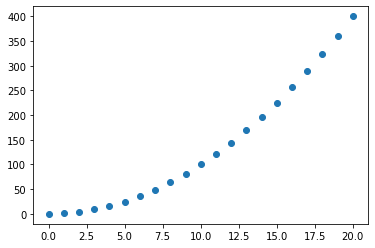

In [12]:
plt.scatter(X,y)
plt.show()

corr() method compute pairwise correlation of columns, excluding NA/null values.  The default version of method computes pearson but you can change it to kendall or spearman.  
    **pearson** : standard correlation coefficient  
    **kendall** : Kendall Tau correlation coefficient  
    **spearman** : Spearman rank correlation  

In [13]:
corr_matrix=iris_data.corr()
#corr_matrix=iris_data.corr(method="pearson")
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [14]:
corr, p_value = pearsonr(iris_data["sepal_length"],iris_data["petal_length"])
print("Pearsons correlation: %.6f" % corr)

Pearsons correlation: 0.871754


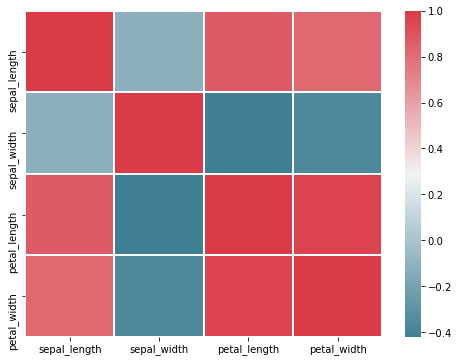

In [15]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(8, 6))
ax=sns.heatmap(corr_matrix, linewidths=1, cmap=cmap)

# f, ax = plt.subplots(figsize=(8, 6))
# ax=sns.heatmap(corr_matrix, linewidths=1, cmap="YlGnBu")

In [16]:
print(corr_matrix["sepal_length"].sort_values(ascending=False))

sepal_length    1.000000
petal_length    0.871754
petal_width     0.817954
sepal_width    -0.109369
Name: sepal_length, dtype: float64


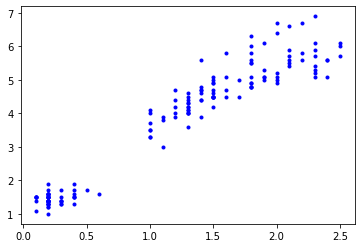

In [17]:
plt.plot(iris_data["petal_width"], iris_data["petal_length"], "b.")

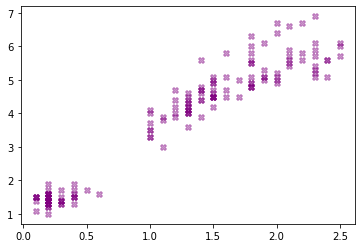

In [18]:
plt.scatter(iris_data["petal_width"], iris_data["petal_length"], color="purple", marker="X", alpha=0.4)
plt.show()
# The alpha blending value, between 0 (transparent) and 1 (opaque).

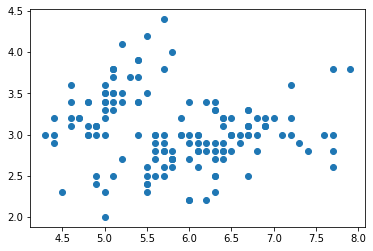

In [19]:
plt.scatter(iris_data["sepal_length"], iris_data["sepal_width"])
plt.show()

## Pairplots  
Pairplots show pairwise relationships in a dataset.

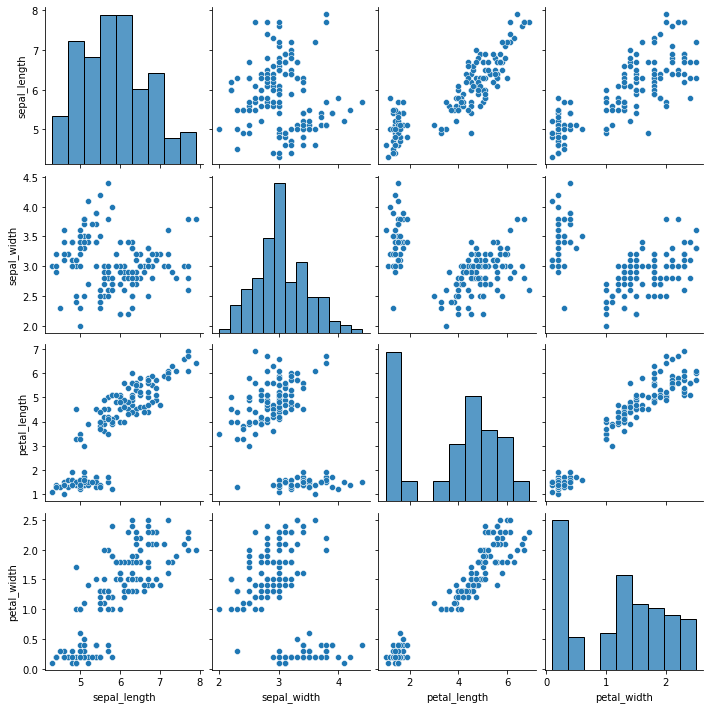

In [20]:
sns.pairplot(iris_data)

You can show different levels of a categorical variable by using pairplots.  
You can customize your pairplots by changing palette options or marker symbols.
You can see the palette options via https://seaborn.pydata.org/tutorial/color_palettes.html

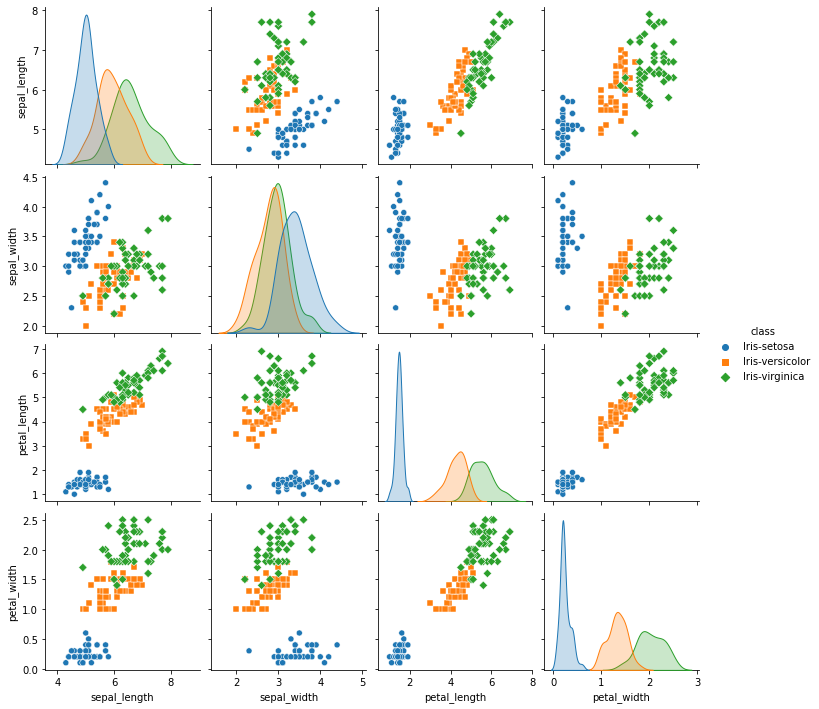

In [21]:
sns.pairplot(iris_data, hue="class", markers=["o", "s", "D"])
# sns.pairplot(iris_data, hue="class", markers=["o", "s", "D"], palette="Set2")

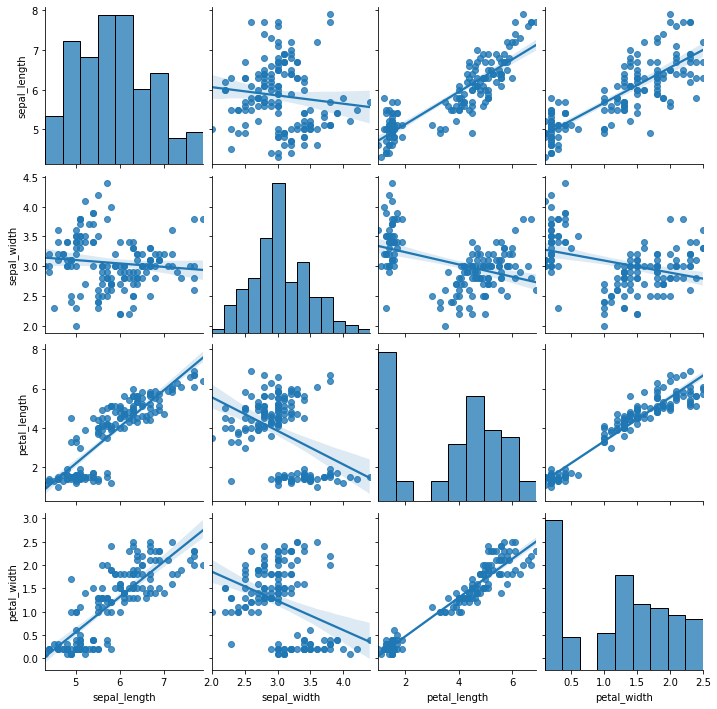

In [22]:
sns.pairplot(iris_data, kind="reg")

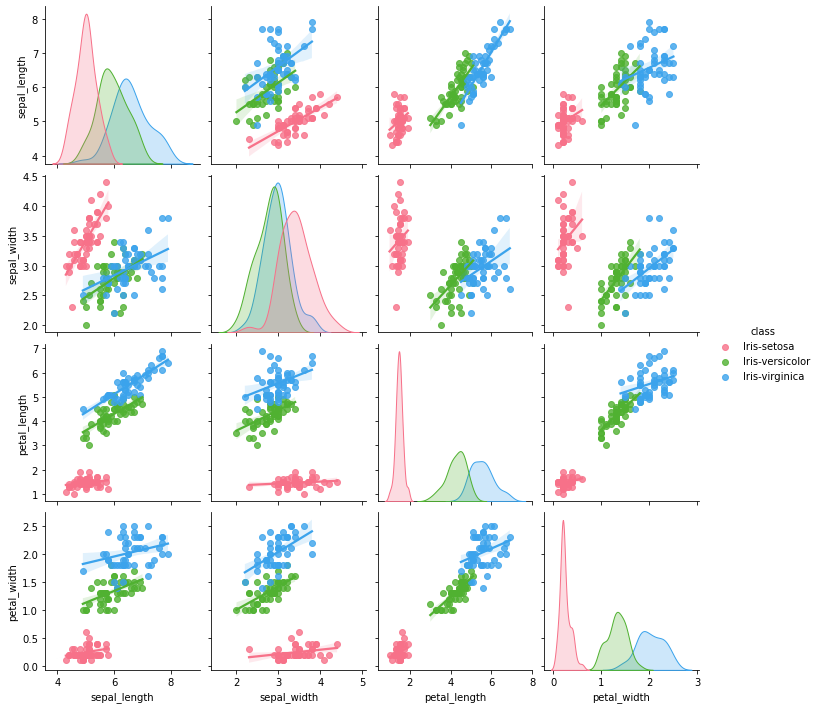

In [23]:
sns.pairplot(iris_data, hue="class", kind="reg", palette="husl")

## Subplotting

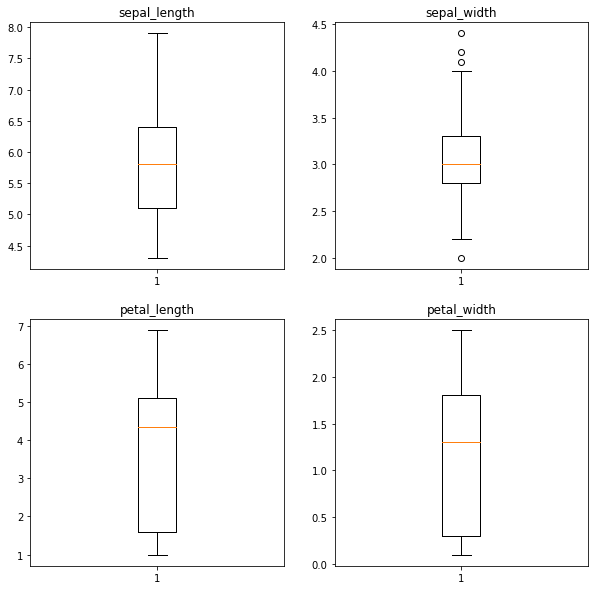

In [24]:
rows=2
columns=2
f, axes = plt.subplots(rows,columns, figsize=(10, 10))
count=0
for i in range(rows):
    for j in range(columns): 
        axes[i,j].set_title(iris_data.columns[count])
#         axes[i,j].hist(iris_data.iloc[:,count])
        axes[i,j].boxplot(iris_data.iloc[:,count])
        count=count+1        

### Seaborn library examples

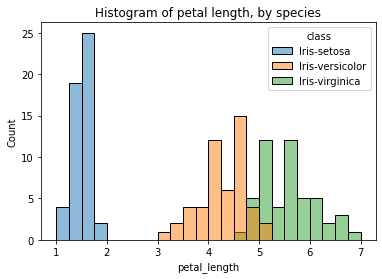

In [25]:
sns.histplot(data=iris_data, x="petal_length", hue="class", binwidth=0.25)
plt.title("Histogram of petal length, by species")
plt.show()

**Please try to comment distribution of the attributes by defining them as left skewed, right skewed, symmetric, unimodal or bimodal, etc**

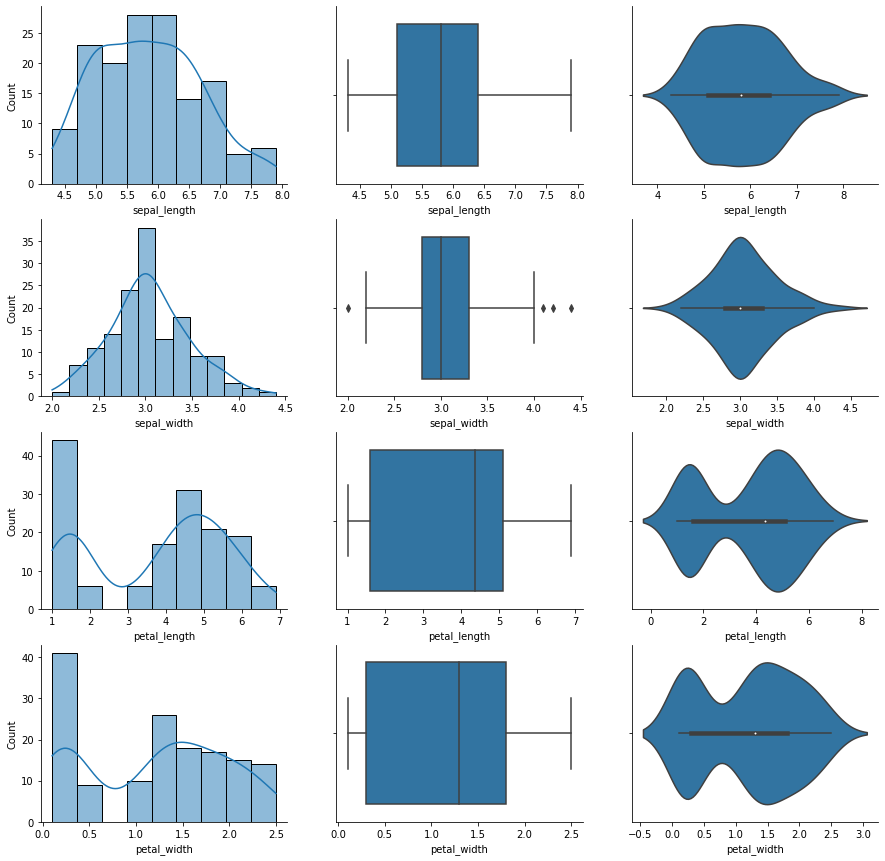

In [26]:
f, axes = plt.subplots(4, 3, figsize=(15, 15))
sns.despine(right=True)
count=0
for i in range(4):      
    sns.histplot(iris_data.iloc[:,count], ax=axes[i,0], kde=True)
    sns.boxplot(x=iris_data.iloc[:,count], ax=axes[i,1])
    sns.violinplot(x=iris_data.iloc[:,count], ax=axes[i,2])
    count=count+1

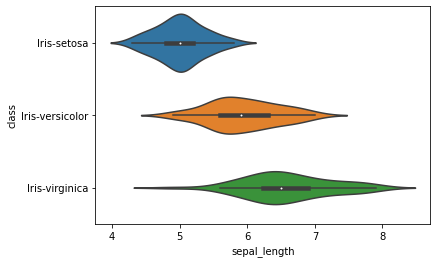

In [27]:
ax = sns.violinplot(x="sepal_length", y="class", data=iris_data)

In [28]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal_length,petal_length,class,is_big
0,5.1,1.4,Iris-setosa,0
1,4.9,1.4,Iris-setosa,0
2,4.7,1.3,Iris-setosa,0
3,4.6,1.5,Iris-setosa,0
4,5.0,1.4,Iris-setosa,0


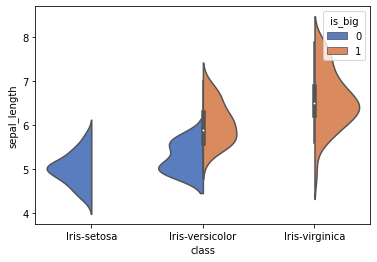

In [29]:
# df=pd.DataFrame()

df=iris_data[["sepal_length","petal_length","class"]].copy()
# df["setosa"] = np.where(iris_data['class'] == "Iris-setosa", 1,0)
df["is_big"] = np.where(iris_data["petal_length"] >3.75, 1,0)
ax = sns.violinplot(x="class",y="sepal_length", hue="is_big",  data=df, palette="muted", split=True)
df.head()

In [30]:
print(np.sum( df["class"]=="Iris-setosa") ,np.sum( (df["class"]=="Iris-setosa") & (df["petal_length"]>3.75 )))
print(np.sum( df["class"]=="Iris-versicolor") ,np.sum( (df["class"]=="Iris-versicolor") & (df["petal_length"]>3.75 )))
print(np.sum( df["class"]=="Iris-virginica") ,np.sum( (df["class"]=="Iris-virginica") & (df["petal_length"]>3.75 )))

50 0
50 43
50 50


## Normality Check

### QQ Plots and Normality Tests


The quantile-quantile plot, or QQplot, is a simple graphical method for comparing two sets of sample quantiles.
If two datasets come from the same distribution, the points should lie roughly on a line.  
  
You can use QQ-plots to understand the distribution of the data is normal or not.
* The scatter of symmetric data tends to fit the diagonal line  
* The scatter of skewed data tends to form curves moving away from the line at the ends while looking at the QQ Plot.

Let's look at the example below. 
array1 consists of 500 random float numbers which are between 0 and 1.
array2 consistns of 500 random numbers which come from standard normal distribution (with mean=0 and std=1)

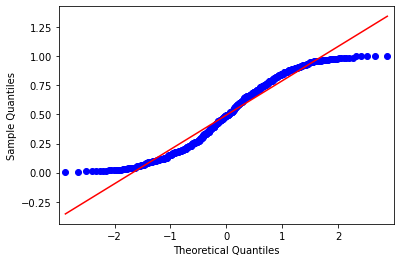

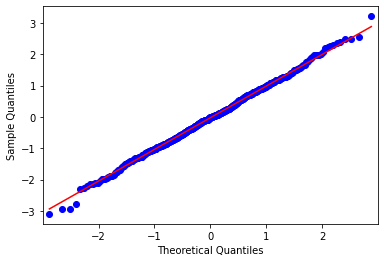

In [31]:
# np.random.seed(seed=123)
array1 = np.random.rand(500)
array2 =np.random.normal(0,1, 500)
sm.qqplot(array1, line="s") 
sm.qqplot(array2, line="s") 
py.show() 

For testing normality,  Shapiro-Wilk’s W test and Kolmogorov-Smirnov tests can be used.However, both tests are sensitive to outliers and are influenced by sample size.

* Shapiro-Wilk’s W test is generally preffered for smaller samples. 
* If n is greater than 100, Kolmogorov-Smirnov is generally preferred

**Please be aware that if your data set contains outliers, these results may not reflect the real situation.**

$H_{0}$: The data is normally distributed.  
$H_{1}$: The data is not normally distributed.  
Assume that alpha=0.05 If p-value is >0.05, it can be said that data is normality distributed.

In [32]:
test_stat_shapiro_a1, p_value_shapiro_a1=stats.shapiro(array1)
test_stat_shapiro_a2, p_value_shapiro_a2=stats.shapiro(array2)
print("For array1 p value:%.6f" % p_value_shapiro_a1)
print("For array2 p value:%.6f" % p_value_shapiro_a2)

For array1 p value:0.000000
For array2 p value:0.947332


In [33]:
test_stat_ks_a1, p_value_ks_a1=stats.kstest(array1, cdf="norm")
test_stat_ks_a2, p_value_ks_a2=stats.kstest(array2, cdf="norm")
print("For array1 p value:%.6f" % p_value_ks_a1)
print("For array2 p value:%.6f" % p_value_ks_a2)

For array1 p value:0.000000
For array2 p value:0.764166


## QQ Plots of iris_data attributes

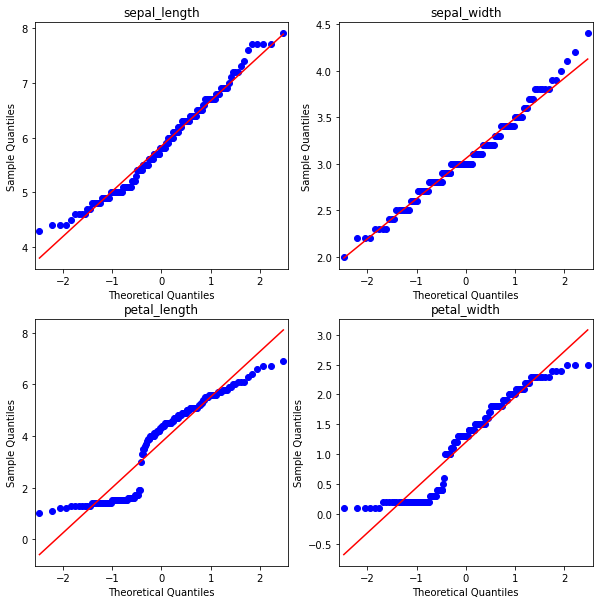

In [34]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
count=0
for i in range(2):
    for j in range(2): 
        axes[i,j].set_title(iris_data.columns[count])
        sm.qqplot(iris_data.iloc[:,count], line="s", ax=axes[i,j])
        count=count+1  

## Outlier Detection

An outlier is a data point which differs significantly from the rest of the observations in a dataset.  
For example, if your score is 95 while the IS709 exam average of the class was 60, congratulations you are probably an outlier.

Outliers may reduce the quality of the data set, impact the results of analsis and modeling seriously. Therefore, it becomes to harder to detect underlying patterns in the data. So, we need to deal with this situation. There are several ways to detect outliers such as:

* boxplots 
* standard deviation: z-score
* DBScan Clustering
* Isolation Forests

**Boxplot method is implemented below.**

![](boxplot.png)  


In [35]:
numeric_columns=["sepal_length", "sepal_width", "petal_length","petal_width"]
for columns in numeric_columns:
    quantiles=iris_data[columns].quantile(q=[0.25,0.50,0.75]).values
    q1=quantiles[0]
    q2=quantiles[1]
    q3=quantiles[2]
    iqr=q3-q1
    outliers=iris_data[(iris_data[columns] < q1-1.5*iqr ) | (iris_data[columns] >  q3+ 1.5*iqr)][columns]
    print("number of outliers in", columns, ":", (len(outliers))) 

number of outliers in sepal_length : 0
number of outliers in sepal_width : 4
number of outliers in petal_length : 0
number of outliers in petal_width : 0


In [36]:
quantiles=iris_data["sepal_width"].quantile(q=[0.25,0.50,0.75]).values
q1=quantiles[0]
q2=quantiles[1]
q3=quantiles[2]
iqr=q3-q1
outliers=iris_data[(iris_data["sepal_width"] < q1-1.5*iqr ) | (iris_data["sepal_width"] >  q3+ 1.5*iqr)]["sepal_width"]
outliers

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64

In [37]:
remove_outliers=iris_data[(iris_data["sepal_width"] >= q1-1.5*iqr ) &(iris_data["sepal_width"] <=  q3+ 1.5*iqr)]["sepal_width"]

In [38]:
mean_change= (np.mean(iris_data["sepal_width"]) - np.mean(remove_outliers) )/ np.mean(iris_data["sepal_width"])
std_change= (np.std(iris_data["sepal_width"]) - np.std(remove_outliers) )/ np.std(iris_data["sepal_width"])
print("change in mean: %.2f "% mean_change)
print("change in std: %.2f "% std_change)

change in mean: 0.01 
change in std: 0.09 


The outliers can affect the mean and standard deviation seriously. As a remeditation, these values can be dropped from the the data set